# 5. Testing Evaluation and Conclusions

## 5.1. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from joblib import dump,load
import tensorflow as tf

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.metrics import accuracy_score

In [2]:
# Models
knn = load('./Models/knn')
svc = load('./Models/svc')
ada = load('./Models/ada')
gbc = load('./Models/gbc')
xgb = load('./Models/xgb')
vc_soft = load('./Models/vc_soft')
vc_hard = load('./Models/vc_hard')
sc = load('./Models/sc')
nn = tf.keras.models.load_model('./Models/nn/')

In [3]:
# Test data
X_test = pd.read_csv('./Data/X_test.csv',index_col=0)
y_test = pd.read_csv('./Data/y_test.csv',index_col=0)

In [4]:
# Other information
df_final = pd.read_csv('./Data/final_cleaned.csv',index_col=0)
test_indices = pd.read_csv('./Data/test_indices.csv',index_col=0).values.tolist()
test_indices = [val for sublist in test_indices for val in sublist]

## 5.2. Model Evaluation on Test Data

We will now evaluate each of the models based on their performance on the test data. F1-score will remain as the primary metric for evaluation. 

#### 1. Tuned k-nearest neighbors with tuned bagging

In [5]:
predictions_knn = knn.predict(X_test)

In [6]:
# F1-score
f1_score(y_test,predictions_knn)

0.7142857142857143

In [7]:
print(confusion_matrix(y_test,predictions_knn))

[[526   6]
 [  6  15]]


In [8]:
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       532
           1       0.71      0.71      0.71        21

    accuracy                           0.98       553
   macro avg       0.85      0.85      0.85       553
weighted avg       0.98      0.98      0.98       553



#### 2. Tuned support vector machine with tuned bagging

In [9]:
predictions_svc = svc.predict(X_test)

In [10]:
# F1-score
f1_score(y_test,predictions_svc)

0.7555555555555556

In [11]:
print(confusion_matrix(y_test,predictions_svc))

[[525   7]
 [  4  17]]


In [12]:
print(classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       532
           1       0.71      0.81      0.76        21

    accuracy                           0.98       553
   macro avg       0.85      0.90      0.87       553
weighted avg       0.98      0.98      0.98       553



#### 3. Tuned AdaBoost

In [13]:
predictions_ada = ada.predict(X_test)

In [14]:
# F1-score
f1_score(y_test,predictions_ada)

0.717948717948718

In [15]:
print(confusion_matrix(y_test,predictions_ada))

[[528   4]
 [  7  14]]


In [16]:
print(classification_report(y_test,predictions_ada))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       532
           1       0.78      0.67      0.72        21

    accuracy                           0.98       553
   macro avg       0.88      0.83      0.85       553
weighted avg       0.98      0.98      0.98       553



#### 4. Tuned gradient tree boosting

In [17]:
predictions_gbc = gbc.predict(X_test)

In [18]:
# F1-score
f1_score(y_test,predictions_gbc)

0.717948717948718

In [19]:
print(confusion_matrix(y_test,predictions_gbc))

[[528   4]
 [  7  14]]


In [20]:
print(classification_report(y_test,predictions_gbc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       532
           1       0.78      0.67      0.72        21

    accuracy                           0.98       553
   macro avg       0.88      0.83      0.85       553
weighted avg       0.98      0.98      0.98       553



#### 5. Tuned XGBoost

In [21]:
predictions_xgb = xgb.predict(X_test)

In [22]:
# F1-score
f1_score(y_test,predictions_xgb)

0.6956521739130435

In [23]:
print(confusion_matrix(y_test,predictions_xgb))

[[523   9]
 [  5  16]]


In [24]:
print(classification_report(y_test,predictions_xgb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       532
           1       0.64      0.76      0.70        21

    accuracy                           0.97       553
   macro avg       0.82      0.87      0.84       553
weighted avg       0.98      0.97      0.98       553



#### 6. Voting classifier (soft)

In [25]:
predictions_vc_soft = vc_soft.predict(X_test)

In [26]:
# F1-score
f1_score(y_test,predictions_vc_soft)

0.8095238095238095

In [27]:
print(confusion_matrix(y_test,predictions_vc_soft))

[[528   4]
 [  4  17]]


In [28]:
print(classification_report(y_test,predictions_vc_soft))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       532
           1       0.81      0.81      0.81        21

    accuracy                           0.99       553
   macro avg       0.90      0.90      0.90       553
weighted avg       0.99      0.99      0.99       553



#### 7. Voting classifier (hard)

In [29]:
predictions_vc_hard = vc_hard.predict(X_test)

In [30]:
# F1-score
f1_score(y_test,predictions_vc_hard)

0.7567567567567567

In [31]:
print(confusion_matrix(y_test,predictions_vc_hard))

[[530   2]
 [  7  14]]


In [32]:
print(classification_report(y_test,predictions_vc_hard))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       532
           1       0.88      0.67      0.76        21

    accuracy                           0.98       553
   macro avg       0.93      0.83      0.87       553
weighted avg       0.98      0.98      0.98       553



#### 8. Stacking classifier

In [33]:
predictions_sc = sc.predict(X_test)

In [34]:
# F1-score
f1_score(y_test,predictions_sc)

0.717948717948718

In [35]:
print(confusion_matrix(y_test,predictions_sc))

[[528   4]
 [  7  14]]


In [36]:
print(classification_report(y_test,predictions_sc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       532
           1       0.78      0.67      0.72        21

    accuracy                           0.98       553
   macro avg       0.88      0.83      0.85       553
weighted avg       0.98      0.98      0.98       553



#### 9. Tuned neural network

In [37]:
predictions_nn = nn.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [38]:
# Making neural-network predictions one-dimensional
predictions_nn = [val for sublist in predictions_nn for val in sublist]

In [39]:
# F1-score
f1_score(y_test,predictions_nn)

0.6666666666666666

In [40]:
print(confusion_matrix(y_test,predictions_nn))

[[519  13]
 [  4  17]]


In [41]:
print(classification_report(y_test,predictions_nn))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       532
           1       0.57      0.81      0.67        21

    accuracy                           0.97       553
   macro avg       0.78      0.89      0.83       553
weighted avg       0.98      0.97      0.97       553



Clearly, we can conclude that the soft voting classifier performs the best. It boasts the highest f1-score on the test data, which can be attributed to its high accuracy and balanced misclassifications. This result is not especially surprising since, after all, voting classifiers are constituted by a wide variety of models. 

## 5.3. Visualizing Model Performance

Let us first look at how much consensus there was in our models' predictions.

In [42]:
predictions = pd.DataFrame({'K-Nearest Neighbors':predictions_knn,'Support Vector Machine':predictions_svc,'AdaBoost':predictions_ada,'Gradient Tree Boosting':predictions_gbc,'XGBoost':predictions_xgb,'Soft Voting Classifier':predictions_vc_soft,'Hard Voting Classifier':predictions_vc_hard,'Stacking Classifier':predictions_sc,'Neural Network':predictions_nn})

In [43]:
predictions

,K-Nearest Neighbors,Support Vector Machine,AdaBoost,Gradient Tree Boosting,XGBoost,Soft Voting Classifier,Hard Voting Classifier,Stacking Classifier,Neural Network
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,0,1,1
3,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
548,0,0,0,0,0,0,0,0,0
549,0,0,0,0,0,0,0,0,0
550,0,0,0,0,0,0,0,0,0
551,0,0,0,0,0,0,0,0,0


In [44]:
predictions.sum(axis=1).value_counts().sort_index()

0    516
1      7
2      7
3      1
4      2
5      1
6      3
7      2
8      4
9     10
dtype: int64

We observe that only seven of the 553 players were highly disputed - having a sum between 3 and 6. The majority of the misclassifications by each model were likely comprised of these seven players.

We will now look at plots of the accuracy score and the f1-score for each model.

In [45]:
scores = []
for model in predictions.columns:
    accuracy = accuracy_score(y_test,predictions[model])
    f1 = f1_score(y_test,predictions[model])
    scores.append((accuracy,f1))

In [46]:
scores

[(0.9783001808318263, 0.7142857142857143),
 (0.9801084990958409, 0.7555555555555556),
 (0.9801084990958409, 0.717948717948718),
 (0.9801084990958409, 0.717948717948718),
 (0.9746835443037974, 0.6956521739130435),
 (0.9855334538878843, 0.8095238095238095),
 (0.9837251356238698, 0.7567567567567567),
 (0.9801084990958409, 0.717948717948718),
 (0.969258589511754, 0.6666666666666666)]

In [47]:
scores_df = pd.DataFrame({'Model':predictions.columns,'Scores':scores})
scores_df['Accuracy'] = scores_df['Scores'].apply(lambda x:x[0])
scores_df['F1-Score'] = scores_df['Scores'].apply(lambda x:x[1])
scores_df = scores_df.drop(['Scores'],axis=1)

In [48]:
scores_df

,Model,Accuracy,F1-Score
0,K-Nearest Neighbors,0.978300,0.714286
1,Support Vector Machine,0.980108,0.755556
2,AdaBoost,0.980108,0.717949
3,Gradient Tree Boosting,0.980108,0.717949
4,XGBoost,0.974684,0.695652
5,Soft Voting Classifier,0.985533,0.809524
6,Hard Voting Classifier,0.983725,0.756757
7,Stacking Classifier,0.980108,0.717949
8,Neural Network,0.969259,0.666667


In [49]:
scores_df_modified = pd.melt(scores_df,id_vars='Model',var_name='Score Type',value_name='Proportion')

In [50]:
scores_df_modified

,Model,Score Type,Proportion
0,K-Nearest Neighbors,Accuracy,0.978300
1,Support Vector Machine,Accuracy,0.980108
2,AdaBoost,Accuracy,0.980108
3,Gradient Tree Boosting,Accuracy,0.980108
4,XGBoost,Accuracy,0.974684
5,Soft Voting Classifier,Accuracy,0.985533
6,Hard Voting Classifier,Accuracy,0.983725
7,Stacking Classifier,Accuracy,0.980108
8,Neural Network,Accuracy,0.969259
9,K-Nearest Neighbors,F1-Score,0.714286


(0.6, 1)

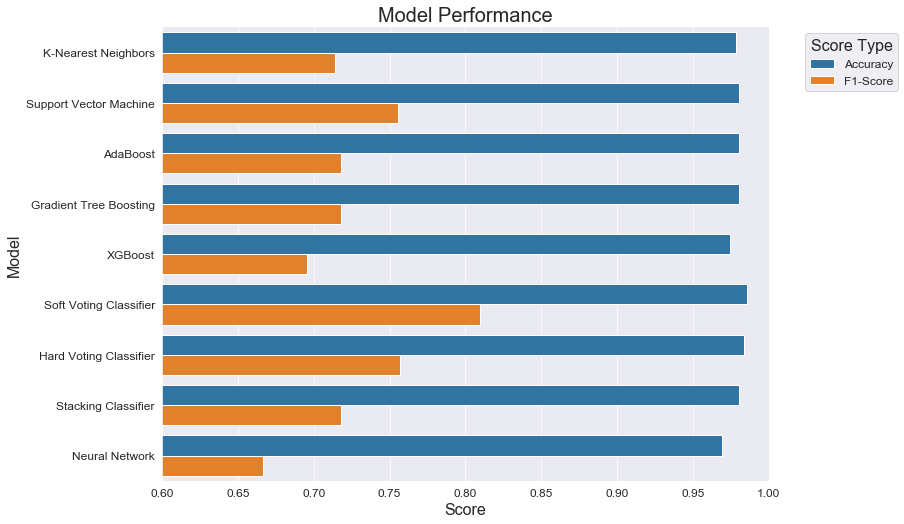

In [51]:
sns.set_style('darkgrid')
sns.catplot(x='Proportion',y='Model',hue='Score Type',data=scores_df_modified,kind='bar',height=7,aspect=1.5,legend=False)

plt.ylabel('Model',fontsize=16)
plt.yticks(fontsize=12)
plt.xlabel('Score',fontsize=16)
plt.xticks(fontsize=12)
plt.title('Model Performance',fontsize=20)
plt.legend(fontsize=12,title='Score Type',title_fontsize=16,bbox_to_anchor=(1.05, 1))

plt.xlim([.6,1])

It should be quite obvious that the soft voting classifier outperforms the rest of the models. Both the accuracy and f1-score metrics support this conclusion.

## 5.4. Saving Final Model

We will save the soft voting classifier as our final model.

In [52]:
final_model = vc_soft

In [53]:
dump(final_model,'./Models/final_model')

['./Models/final_model']

## 5.5. Reflections

To get a more concrete idea of how our model performed, we will pair our predictions with the original, unprocessed test data.

In [54]:
df_final_test = df_final.iloc[test_indices]
df_final_test = df_final_test.reset_index(drop=True)

In [55]:
df_final_test

,Player,G_sum,GS_sum,MP_sum,FG_sum,2P_sum,FT_sum,TRB_sum,AST_sum,PF_sum,...,award_count,all_team_awards,league_awards,years_coaching,lottery,hof,all_star_count,championships,O,W
0,Norm Swanson,63.0,0.0,611.0,31.0,31.0,38.0,110.0,33.0,91.0,...,0,0,0,0,0,0,0,0,0,1
1,Frank Williams,86.0,3.0,952.0,92.0,68.0,45.0,77.0,166.0,87.0,...,0,0,0,0,0,0,0,0,0,0
2,Ray Scott,756.0,0.0,23785.0,4364.0,4364.0,2628.0,7914.0,1778.0,2250.0,...,1,0,0,4,1,0,0,0,0,0
3,Skip Harlicka,26.0,0.0,218.0,41.0,41.0,24.0,16.0,37.0,29.0,...,0,0,0,0,1,0,0,0,0,1
4,Byron Irvin,87.0,8.0,849.0,165.0,158.0,114.0,123.0,73.0,77.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,Victor Alexander,286.0,155.0,5755.0,1101.0,1083.0,322.0,1384.0,257.0,713.0,...,0,0,0,0,0,0,0,0,0,0
549,Terry Davis,480.0,275.0,10369.0,1202.0,1199.0,654.0,2887.0,273.0,1176.0,...,0,0,0,0,0,0,0,0,0,0
550,Quintin Dailey,528.0,140.0,12170.0,2936.0,2915.0,1577.0,1307.0,1188.0,1231.0,...,0,0,0,0,1,0,0,0,0,0
551,Sean Marks,230.0,11.0,2275.0,259.0,254.0,115.0,501.0,50.0,342.0,...,0,0,0,0,0,0,0,1,0,1


In [56]:
df_final_test = pd.concat([df_final_test,pd.DataFrame({'hof_predicted':predictions_vc_soft})],axis=1)

In [57]:
# Test data with predictions appended
df_final_test

,Player,G_sum,GS_sum,MP_sum,FG_sum,2P_sum,FT_sum,TRB_sum,AST_sum,PF_sum,...,all_team_awards,league_awards,years_coaching,lottery,hof,all_star_count,championships,O,W,hof_predicted
0,Norm Swanson,63.0,0.0,611.0,31.0,31.0,38.0,110.0,33.0,91.0,...,0,0,0,0,0,0,0,0,1,0
1,Frank Williams,86.0,3.0,952.0,92.0,68.0,45.0,77.0,166.0,87.0,...,0,0,0,0,0,0,0,0,0,0
2,Ray Scott,756.0,0.0,23785.0,4364.0,4364.0,2628.0,7914.0,1778.0,2250.0,...,0,0,4,1,0,0,0,0,0,1
3,Skip Harlicka,26.0,0.0,218.0,41.0,41.0,24.0,16.0,37.0,29.0,...,0,0,0,1,0,0,0,0,1,0
4,Byron Irvin,87.0,8.0,849.0,165.0,158.0,114.0,123.0,73.0,77.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,Victor Alexander,286.0,155.0,5755.0,1101.0,1083.0,322.0,1384.0,257.0,713.0,...,0,0,0,0,0,0,0,0,0,0
549,Terry Davis,480.0,275.0,10369.0,1202.0,1199.0,654.0,2887.0,273.0,1176.0,...,0,0,0,0,0,0,0,0,0,0
550,Quintin Dailey,528.0,140.0,12170.0,2936.0,2915.0,1577.0,1307.0,1188.0,1231.0,...,0,0,0,1,0,0,0,0,0,0
551,Sean Marks,230.0,11.0,2275.0,259.0,254.0,115.0,501.0,50.0,342.0,...,0,0,0,0,0,0,1,0,1,0


Here are the hall-of-fame players that we correctly predicted:

In [58]:
df_final_test[(df_final_test['hof']==1) & (df_final_test['hof_predicted']==1)]

,Player,G_sum,GS_sum,MP_sum,FG_sum,2P_sum,FT_sum,TRB_sum,AST_sum,PF_sum,...,all_team_awards,league_awards,years_coaching,lottery,hof,all_star_count,championships,O,W,hof_predicted
9,Red Holzman,298.0,0.0,2106.0,605.0,605.0,410.0,344.0,572.0,385.0,...,0,1,18,0,1,0,2,0,1,1
19,George Yardley,533.0,0.0,17606.0,3639.0,3639.0,2994.0,4651.0,880.0,1585.0,...,2,0,0,1,1,6,0,0,1,1
40,Al Cervi,202.0,0.0,1151.0,405.0,405.0,781.0,261.0,648.0,669.0,...,1,0,9,0,1,0,1,0,1,1
176,Karl Malone,1476.0,1471.0,54852.0,13528.0,13443.0,9787.0,14968.0,5248.0,4578.0,...,18,2,0,1,1,13,0,0,0,1
257,Paul Arizin,713.0,0.0,24897.0,5628.0,5628.0,5010.0,6129.0,1665.0,2764.0,...,4,0,0,0,1,10,1,0,1,1
264,Magic Johnson,906.0,763.0,33245.0,6211.0,5886.0,4960.0,6559.0,10141.0,2050.0,...,10,6,1,1,1,3,0,0,0,1
306,Connie Hawkins,578.0,0.0,19995.0,3417.0,3417.0,2398.0,4536.0,2459.0,1682.0,...,3,3,0,0,1,5,0,0,0,1
328,Hakeem Olajuwon,1238.0,1186.0,44222.0,10749.0,10724.0,5423.0,13748.0,3058.0,4383.0,...,21,5,0,1,1,12,2,0,0,1
352,Jerry Lucas,896.0,0.0,34551.0,6114.0,6114.0,2835.0,13893.0,2907.0,2551.0,...,5,1,0,0,1,7,1,0,1,1
430,Bailey Howell,950.0,0.0,30627.0,6515.0,6515.0,4740.0,9383.0,1853.0,3498.0,...,1,0,0,1,1,6,2,0,1,1


Here are all of the players that we incorrectly predicted:

In [59]:
df_final_test[df_final_test['hof']!=df_final_test['hof_predicted']]

,Player,G_sum,GS_sum,MP_sum,FG_sum,2P_sum,FT_sum,TRB_sum,AST_sum,PF_sum,...,all_team_awards,league_awards,years_coaching,lottery,hof,all_star_count,championships,O,W,hof_predicted
2,Ray Scott,756.0,0.0,23785.0,4364.0,4364.0,2628.0,7914.0,1778.0,2250.0,...,0,0,4,1,0,0,0,0,0,1
18,Slater Martin,811.0,0.0,24290.0,2876.0,2876.0,2303.0,2590.0,3429.0,2431.0,...,5,0,3,0,1,7,4,0,1,0
121,Dick McGuire,738.0,0.0,17170.0,2048.0,2048.0,1825.0,2784.0,4205.0,1695.0,...,1,0,7,1,1,7,0,0,1,0
209,Rudy LaRusso,736.0,0.0,24487.0,4102.0,4102.0,3303.0,6936.0,1556.0,2553.0,...,1,0,0,1,0,5,0,0,1,1
263,Calvin Murphy,1002.0,0.0,30607.0,7247.0,7237.0,3445.0,2103.0,4402.0,3250.0,...,0,0,0,0,1,1,0,0,0,0
360,Charlie Scott,639.0,0.0,21751.0,4548.0,4546.0,2003.0,2283.0,3074.0,2311.0,...,2,1,0,0,0,5,0,0,0,1
393,Larry Foust,817.0,0.0,21890.0,3814.0,3814.0,3570.0,8041.0,1368.0,2909.0,...,2,0,0,1,0,8,0,0,1,1
443,Fred Taylor,122.0,0.0,1118.0,182.0,182.0,108.0,194.0,87.0,193.0,...,0,0,0,0,1,0,0,0,0,0


Fortunately, we correctly classified all of the "big names," such as Larry Bird or Wilt Chamberlain. Out of the players we misclassified, the two major suprises are Calvin Murphy and Fred Taylor due to their lack of accolades. 

It does appear that coaching experience plays a large part in the model. Although we did intend to use coaching as a factor, we probably should have limited the factors to playing. Nevertheless, we really had no easy way of determining whether a former player was inducted for his playing, coaching, or other contributions. 

Ultimately, based on our model's performance on the test data, we now have answers to these two fundamental questions:
1. Given a random hall-of-fame NBA player, what are the odds that the model correctly predicts that player was inducted into the hall of fame?
2. Given a random former NBA player, what are the odds that the model correctly predicts whether or not that player was inducted into the hall of fame?

Here are the answer to the questions:
1. Our model produced a recall score of 81% on the test data. Therefore, our model can correctly predict that a random hall-of-fame NBA player was inducted into the hall of fame 81% of the time. 
2. Our model produced an accuracy score of 99% on the test data. Therefore, our model can correctly predict whether or not a random former NBA player was inducted into the hall of fame 99% of the time. 

I am happy to say that the model is also quite balanced in its predictions. When predicting the test data, it had equivalent type-1 and type-2 error rates. This balance is reflected in the f1-score of 81%. 

Below is the complete statistical report on the final model's performance. 

In [60]:
print(confusion_matrix(y_test,predictions_vc_soft))

[[528   4]
 [  4  17]]


In [61]:
print(classification_report(y_test,predictions_vc_soft))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       532
           1       0.81      0.81      0.81        21

    accuracy                           0.99       553
   macro avg       0.90      0.90      0.90       553
weighted avg       0.99      0.99      0.99       553



In [62]:
print('Accuracy:',scores_df[scores_df['Model']=='Soft Voting Classifier']['Accuracy'].iloc[0])
print('F1-score:',scores_df[scores_df['Model']=='Soft Voting Classifier']['F1-Score'].iloc[0])

Accuracy: 0.9855334538878843
F1-score: 0.8095238095238095


## 5.6. Saving Test Data Frame with Predictions

In [63]:
df_final_test

,Player,G_sum,GS_sum,MP_sum,FG_sum,2P_sum,FT_sum,TRB_sum,AST_sum,PF_sum,...,all_team_awards,league_awards,years_coaching,lottery,hof,all_star_count,championships,O,W,hof_predicted
0,Norm Swanson,63.0,0.0,611.0,31.0,31.0,38.0,110.0,33.0,91.0,...,0,0,0,0,0,0,0,0,1,0
1,Frank Williams,86.0,3.0,952.0,92.0,68.0,45.0,77.0,166.0,87.0,...,0,0,0,0,0,0,0,0,0,0
2,Ray Scott,756.0,0.0,23785.0,4364.0,4364.0,2628.0,7914.0,1778.0,2250.0,...,0,0,4,1,0,0,0,0,0,1
3,Skip Harlicka,26.0,0.0,218.0,41.0,41.0,24.0,16.0,37.0,29.0,...,0,0,0,1,0,0,0,0,1,0
4,Byron Irvin,87.0,8.0,849.0,165.0,158.0,114.0,123.0,73.0,77.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548,Victor Alexander,286.0,155.0,5755.0,1101.0,1083.0,322.0,1384.0,257.0,713.0,...,0,0,0,0,0,0,0,0,0,0
549,Terry Davis,480.0,275.0,10369.0,1202.0,1199.0,654.0,2887.0,273.0,1176.0,...,0,0,0,0,0,0,0,0,0,0
550,Quintin Dailey,528.0,140.0,12170.0,2936.0,2915.0,1577.0,1307.0,1188.0,1231.0,...,0,0,0,1,0,0,0,0,0,0
551,Sean Marks,230.0,11.0,2275.0,259.0,254.0,115.0,501.0,50.0,342.0,...,0,0,0,0,0,0,1,0,1,0


In [64]:
df_final_test.to_csv('./Data/final_test')

## 5.7. Comparisons and Extensions

There are actually very few other NBA hall-of-fame predictors. The most notable one was created by Basketball Reference, and it is commonly cited throughout sports media. From the information Basketball Reference provides, we can reasonably conclude that its model generates a recall score of around 75%. Our model did top this score with a recall score of 81% on the test data.

More information on Basketball Reference's predictions and methodology can be found below:
- Predictions: https://www.basketball-reference.com/leaders/hof_prob.html
- Methodology: https://www.basketball-reference.com/about/hof_prob.html

There are many other applications of predictive modeling to the NBA. Teams are constantly looking to forecast player value, so these models do hold great importance. In the future, I would like to explore predicting if a player becomes an all-star during his career. The challenge to this project would be finding the sufficient amount of training data, but I believe much of the modeling methodology would be similar to that of this project. There is definitely a lot of freedom during data collection, data cleaning, and feature engineering. 

## 5.8. Future Improvements - Comprehensive List

Throughout the course of this project, I kept a running list of potential improvements that I would like to make in the future. Ultimately, I was unable to accomplish everything I wanted due to a lack of time or resources. With that being said, I am still quite happy with the results of this project, and I find it encouraging that there is plenty of room for improvement. 

Here is the breakdown of improvements by section:

#### 1. Data Collection and Initial Cleaning
- Find data with unique player IDs. We had to exclude many players because of issues with names during data merging. 
- Use a data source that is up to date. Since we used data from Kaggle, we had to exclude years after 2012. In the best case scenario, we should have been able to use data through 2017 because players can be inducted after three years of inactivity. 
- Verify correctness of data. 

#### 2. Feature Engineering and Data Merging
- Focus less on coaching or remove players who have coaching experience. There is not a clear distinction in our data as to whether a player was inducted to the hall of fame for playing, coaching, or other contributions. We could eliminate confusion by taking out coaching entirely. 
- Include a position feature (e.g. point guard). 
- Use weighted average for aggregate statistics. Ideally, when we are finding mean statistics, we would like to avoid outlier seasons from skewing the mean. For example, seasons where a player played 20 games should not hold much weight. 
- Find ways to reduce null values from merging data. Fundamentally, we should focus on finding a better data source, but there probably are ways to make merging on name more successful. 
- Group the awards features in more meaningful ways. 
- Add a binary "college or no college" feature. 
- Determine how to combine statistics for players who changed names. Similarly, determine how to distinguish players who have repeated names. 
- Use natural language processing for features related to sentiment analysis. For example, popularity is certainly influential in a player's case for the hall of fame. On-court statistics cannot capture popularity very well. 
- Use per-possession statistics to account for changes in the NBA over time. Unmodified statistics tend to be either inflated or deflated depending on shot-clock rules, fouling tolerance, and other factors. Statistics that are based on each possession are more reflective of a player's abilities. 
- Add a feature that identifies the era in which a player played. 

#### 3. Exploratory Data Analysis and Preprocessing
- Utilize sampling techniques to account for the imbalanced data. For example, we could have artifically generated more balanced data by performing synthetic minority oversampling technique (SMOTE). There are many other sampling possibilities. 
- Figure out how to impute modern statistics for pre-modern NBA players. It would be amazing to incorporate 3PT statistics and advanced statistics into the model. If imputation is unrealistic, perhaps we could make a successful model without removing null values. 
- Use VIF-score and other statistical metrics for feature selection. We decided to use PCA for feature selection, but it would be nice to gain a better understanding of which features matter the most in the model. 
- Select outliers in a more systematic way. Really, our basis was to investigate boxplots and use our best basketball judgement to filter out outliers. 
- See if one-hot encoding performs better than creating dummy variables. 
- Delay preprocessing until stratified k-fold cross-validation. 
- Select the proper number of principal components based on model performance. 
- Remove hall-of-fame outliers from the training data. One example is Fred Taylor, who happened to be an extremely successful NCAA coach. We had no way of knowing his coaching accolades, but he is clearly a statistical outlier. 

#### 4. Modeling and Hyperparameter Tuning
- Experiment to see if bootstrapping yields better performance than stratified k-fold cross-validation. It is widely known that bootstrapping can reduce variance despite an increase in bias. 
- Create dedicated functions/classes for modeling tasks. There is a lot of repetitive code during modeling and evaluation, and functions would help automate the process. 
- Tune the hyperparameters of the stacking classifier's final estimator. 
- Tune the neural-network hyperparametesr with GridSearchCV or manual cross-validation. We decided to tune hyperparameters based on a single training cycle, which can be highly variable. 
- Select the best models more rigorously. We should be looking at more than just the best f1-score on cross-validated, validation, and test data. 

#### 5. Testing Evaluation and Conclusions
- Include the probabilities of classification for each player in the test data. That is, we should be able to see the confidence our final model had in classifying a player in a certain way. This information would allow us to directly compare our predictions with Basketball Reference's predictions.
- Create running predictions for active players. These would be of interest to many NBA fans. 

## 5.9. Last Remarks

We must note that there is always the possiblity of an inactive NBA player being inducted into the hall of fame. Therefore, it is critical that we continually update our data and model so that our predictions maintain accuracy. 

Additionally, we recognize that hall-of-fame criteria have likely changed over time. We can only expect our model to approximate a basis for the criteria. 